  # Cyclistic Bike Analysis
<div>
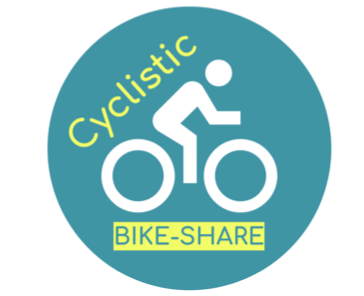
<div/>    

## Cyclistic is a bike sharing company in Chicago that features more than 5800 bicycles and 600 docking stations.  

The aim of this project is to understand how casual riders and annual members use cyclistic bikes differentlty. From the insights, the project aims to provide new strategies to Cyclistic on how to convert a casual rider to annual member. The data contains last **12 months (from June,2021 to May,2022) data** of how casual riders and annual members have used Cyclistic services. Each csv file contains**13 columns**. The final data contains more than **58 lakh rows**. The tools for data analysis used in this project are the packages **Numpy** and **Pandas** and to visualise and explore the data, **Matplotlib** and **Seaborn** are used. 



### Outline
* Reading the Dataset.
* Data Preparation and Cleaning.
* Explanatory Data Analysis
* Conclusion


#### Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

#### Reading the dataset 

In [2]:
cyc6 = pd.read_csv("2021_06.csv")  
cyc7 = pd.read_csv("2021_07.csv")
cyc8 = pd.read_csv("2021_08.csv")    
cyc9 = pd.read_csv("2021_09.csv")
cyc10 = pd.read_csv("2021_10.csv")
cyc11 = pd.read_csv("2021_11.csv")
cyc12 = pd.read_csv("2021_12.csv")
cyc1 = pd.read_csv("2022_01.csv")
cyc2 = pd.read_csv("2022_02.csv")
cyc3 = pd.read_csv("2022_03.csv")
cyc4 = pd.read_csv("2022_04.csv")
cyc5 = pd.read_csv("2022_05.csv")

In [3]:
# combining 12 different files in to a single dataset.
cyclistic_data = pd.concat([cyc6,cyc7,cyc8,cyc9,cyc10,cyc11,cyc12,cyc1,cyc2,cyc3,cyc4,cyc5], ignore_index = True)

In [4]:
df = cyclistic_data.copy() #we will use this copied dataset for our further analysis.

In [5]:
# top 5 rows of the dataset
df.head() 

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,99FEC93BA843FB20,electric_bike,6/13/2021 14:31,6/13/2021 14:34,NaN,NaN,NaN,NaN,41.80,-87.59,41.80,-87.60,member
1,06048DCFC8520CAF,electric_bike,6/4/2021 11:18,6/4/2021 11:24,NaN,NaN,NaN,NaN,41.79,-87.59,41.80,-87.60,member
2,9598066F68045DF2,electric_bike,6/4/2021 9:49,6/4/2021 9:55,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.59,member
3,B03C0FE48C412214,electric_bike,6/3/2021 19:56,6/3/2021 20:21,NaN,NaN,NaN,NaN,41.78,-87.58,41.80,-87.60,member
4,B9EEA89F8FEE73B7,electric_bike,6/4/2021 14:05,6/4/2021 14:09,NaN,NaN,NaN,NaN,41.80,-87.59,41.79,-87.59,member


 **Columns**
* ride_id : id for a particular ride
* rideable type : type of bike used for ride
* started_at : time at which ride started
* ended_at : time at which ride ended
* start_station_name : name of starting station
* start_station_id : id of starting station
* end_station_name : name of end station
* end_station_id : id of end station
* start_lat : latitude of starting station
* start_lng : longitude of starting station
* end_lat : latitude of end station
* end_lng : longitude of end station
* member_casual : annual member or casual rider

In [6]:
# shape function will give the number of rows and columns.
df.shape

(5860776, 13)

 ### Data Cleaning
 #### Checking number of  nan values in each column

In [7]:
df.isnull().sum() 

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    823167
start_station_id      823164
end_station_name      878338
end_station_id        878338
start_lat                  0
start_lng                  0
end_lat                 5036
end_lng                 5036
member_casual              0
dtype: int64

In [8]:
# checking when both end_station_name and end_station_id are not given.
len(df[df["end_station_name"].isna() & df['end_station_id'].isna()]) 

878338

In [9]:
# checking when both start_Station_name and start_station_id are not given.
len(df[df["start_station_name"].isna() & df['start_station_id'].isna()])

823164

Clearly from above there are 3 start station ids whose **start_station_id** is given but the **start_station_name** is ***not given***, so our first task is to find the **start_station_name** from the ids.

In [10]:
df[df["start_station_name"].isna() & df['start_station_id'].notna()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
1298858,176105D1F8A1216B,electric_bike,2021-07-18 03:44:22,2021-07-18 04:12:23,NaN,13221,NaN,NaN,41.907655,-87.672552,41.950000,-87.74000,casual
2424358,DE82A15026BA3056,electric_bike,2021-09-21 18:18:59,2021-09-21 18:21:48,NaN,20215,Hegewisch Metra Station,20215,41.648500,-87.546089,41.648589,-87.54625,casual
3031877,EE197EDA4CF8CFE5,electric_bike,2021-09-22 07:14:42,2021-09-22 07:22:38,NaN,WL-008,NaN,NaN,41.867117,-87.641087,41.880000,-87.64000,casual


In [11]:
# finding start_station name corresponding to start_station_id 13221
stat1_name = df[df["start_station_id"] == "13221"]
stat1_name.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
11276,BC7EC7CE3D178B4E,classic_bike,6/6/2021 11:23,6/6/2021 11:41,Wood St & Milwaukee Ave,13221,Spaulding Ave & Armitage Ave,15650,41.907655,-87.672552,41.917108,-87.710221,member


In [12]:
# finding start_station name corresponding to start_station_id 20215
stat2_name = df[df["start_station_id"] == "20215"]
stat2_name.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
24387,E9EFECF18376CACA,electric_bike,6/8/2021 10:56,6/8/2021 10:57,Hegewisch Metra Station,20215,Hegewisch Metra Station,20215,41.64858,-87.546218,41.648629,-87.546332,member


In [13]:
# finding start_station name corresponding to start_station_id WL-008
stat3_name = df[df["start_station_id"] == "WL-008"]
stat3_name.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
11512,D42269A96BCE8B64,classic_bike,6/17/2021 1:21,6/17/2021 1:27,Clinton St & Roosevelt Rd,WL-008,Halsted St & Maxwell St,TA1309000001,41.867118,-87.641088,41.864883,-87.647071,member


In [14]:
df.at[1298858,"start_station_name"] = "Wood St & Milwaukee Ave"  #filling start_station_name 

In [15]:
df.at[2424358, "start_station_name"] = 'Hegewisch Metra Station'

In [16]:
df.at[3031877, "start_station_name"] = "Clinton St & Roosevelt Rd"

In [17]:
# now we have fixed the start_station_name condition
df[df["start_station_name"].isna() & df["start_station_id"].notna()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


In [18]:
# checking for the duplicates in the dataset.
duplicate = df[df.duplicated()]
duplicate

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


In [19]:
#Checking if there is any row with all nan values.
data = df.dropna(how = "all")
data.shape # no row that has all nan value, so there is no duplicate rows in our data.

(5860776, 13)

In [20]:
data = data.dropna()
data # new data set after dropping the rows that has nan values in its cell and will work on this dataset from nowonwards

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
50,0D904FEC5F84A538,classic_bike,6/4/2021 7:29,6/4/2021 7:45,Orleans St & Elm St,TA1306000006,Orleans St & Elm St,TA1306000006,41.902924,-87.637715,41.902924,-87.637715,member
51,C4185F300D6B552B,classic_bike,6/23/2021 8:39,6/23/2021 8:41,Desplaines St & Kinzie St,TA1306000003,Kingsbury St & Kinzie St,KA1503000043,41.888716,-87.644448,41.889177,-87.638506,member
53,60F97090AC85F55E,classic_bike,6/27/2021 12:26,6/27/2021 12:34,Clark St & Grace St,TA1307000127,Clark St & Leland Ave,TA1309000014,41.950780,-87.659172,41.967096,-87.667429,member
56,FBC7B1F0160AA304,classic_bike,6/1/2021 12:30,6/1/2021 12:33,Kingsbury St & Kinzie St,KA1503000043,Desplaines St & Kinzie St,TA1306000003,41.889177,-87.638506,41.888716,-87.644448,member
57,37A52001AEEFA4E5,classic_bike,6/1/2021 11:32,6/1/2021 11:34,Desplaines St & Kinzie St,TA1306000003,Kingsbury St & Kinzie St,KA1503000043,41.888716,-87.644448,41.889177,-87.638506,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5859919,3E1663D37D8AB75A,classic_bike,2022-05-08 13:28:53,2022-05-08 14:35:23,California Ave & Division St,13256,Wood St & Chicago Ave,637,41.903029,-87.697474,41.895634,-87.672069,casual
5860100,7E17AE7EEA0613B7,classic_bike,2022-05-14 10:10:24,2022-05-14 10:10:37,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,member
5860296,73B9BC566EF662F4,classic_bike,2022-05-06 18:52:52,2022-05-06 19:27:02,Campbell Ave & Montrose Ave,15623,Campbell Ave & Montrose Ave,15623,41.961526,-87.691165,41.961526,-87.691165,member
5860363,1E6E84511515C736,classic_bike,2022-05-30 20:57:52,2022-05-30 21:16:11,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,member


In [21]:
data.reset_index(drop = True, inplace = True) # resetting index of data dataframe. 

In [22]:
data #printing data with new indexing.

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0D904FEC5F84A538,classic_bike,6/4/2021 7:29,6/4/2021 7:45,Orleans St & Elm St,TA1306000006,Orleans St & Elm St,TA1306000006,41.902924,-87.637715,41.902924,-87.637715,member
1,C4185F300D6B552B,classic_bike,6/23/2021 8:39,6/23/2021 8:41,Desplaines St & Kinzie St,TA1306000003,Kingsbury St & Kinzie St,KA1503000043,41.888716,-87.644448,41.889177,-87.638506,member
2,60F97090AC85F55E,classic_bike,6/27/2021 12:26,6/27/2021 12:34,Clark St & Grace St,TA1307000127,Clark St & Leland Ave,TA1309000014,41.950780,-87.659172,41.967096,-87.667429,member
3,FBC7B1F0160AA304,classic_bike,6/1/2021 12:30,6/1/2021 12:33,Kingsbury St & Kinzie St,KA1503000043,Desplaines St & Kinzie St,TA1306000003,41.889177,-87.638506,41.888716,-87.644448,member
4,37A52001AEEFA4E5,classic_bike,6/1/2021 11:32,6/1/2021 11:34,Desplaines St & Kinzie St,TA1306000003,Kingsbury St & Kinzie St,KA1503000043,41.888716,-87.644448,41.889177,-87.638506,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4667295,3E1663D37D8AB75A,classic_bike,2022-05-08 13:28:53,2022-05-08 14:35:23,California Ave & Division St,13256,Wood St & Chicago Ave,637,41.903029,-87.697474,41.895634,-87.672069,casual
4667296,7E17AE7EEA0613B7,classic_bike,2022-05-14 10:10:24,2022-05-14 10:10:37,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,member
4667297,73B9BC566EF662F4,classic_bike,2022-05-06 18:52:52,2022-05-06 19:27:02,Campbell Ave & Montrose Ave,15623,Campbell Ave & Montrose Ave,15623,41.961526,-87.691165,41.961526,-87.691165,member
4667298,1E6E84511515C736,classic_bike,2022-05-30 20:57:52,2022-05-30 21:16:11,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,member


In [23]:
data.info() # for knowing the data_types of different columns and to know whether there is a need to change the data_type of 
              # that respective columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4667300 entries, 0 to 4667299
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 462.9+ MB


 As we can see there are many columns whose datatypes are incorrect for instance the datatype of started_at must be of datetime, so we need to change such datatypes. We will convert them to required datatype as we proceed.

 ##### Creating new Columns
 As we will need columns like **ride_length** of the ride taken, **day**, **month_name**, **hour**, at which ride was taken name** for our analysis. 

In [24]:
data["started_at"] = pd.to_datetime(data["started_at"]) # converting started_at to datetime

In [25]:
data["started_at"] = data["started_at"].dt.floor("T") #dropping seconds from the started_at column as the seconds were not 
                                                     #present in the actual dataset

In [27]:
data["ended_at"] = pd.to_datetime(data["ended_at"]) # converting ended_at to datetime

In [28]:
data["ended_at"] = data["ended_at"].dt.floor("T") #dropping seconds from the ended_at column as the seconds were not 
                                                     #present in the actual dataset.

In [29]:
data["ride_length (min)"] = (data["ended_at"] - data["started_at"]).dt.total_seconds()/60 #calculating ride length for each
                                                                  #ride and creating new column for it.

#### Looking for rows where ride length is less than or equal to zero.

As we know that ride length can't be negative or zero minute, so we have to remove such rows from our data.

In [30]:
p =data[data["ride_length (min)"]<=0] # data frame to see where ride_length <= 0.
p.shape

(37510, 14)

In [31]:
data = data.drop(p.index)  # dropping the rows that have ride_length <= 0.

In [32]:
data = data.reset_index(drop = True) #resetting index and looking at modified data.

In [33]:
data["month"] = data["started_at"].dt.month_name() # adding month column
data["bike_hire_day"] = data["started_at"].dt.day_name() # adding bike_hire_day column
data["started_hour"] = data["started_at"].dt.hour    # adding started_hour column
data # modified data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length (min),month,bike_hire_day,started_hour
0,0D904FEC5F84A538,classic_bike,2021-06-04 07:29:00,2021-06-04 07:45:00,Orleans St & Elm St,TA1306000006,Orleans St & Elm St,TA1306000006,41.902924,-87.637715,41.902924,-87.637715,member,16.0,June,Friday,7
1,C4185F300D6B552B,classic_bike,2021-06-23 08:39:00,2021-06-23 08:41:00,Desplaines St & Kinzie St,TA1306000003,Kingsbury St & Kinzie St,KA1503000043,41.888716,-87.644448,41.889177,-87.638506,member,2.0,June,Wednesday,8
2,60F97090AC85F55E,classic_bike,2021-06-27 12:26:00,2021-06-27 12:34:00,Clark St & Grace St,TA1307000127,Clark St & Leland Ave,TA1309000014,41.950780,-87.659172,41.967096,-87.667429,member,8.0,June,Sunday,12
3,FBC7B1F0160AA304,classic_bike,2021-06-01 12:30:00,2021-06-01 12:33:00,Kingsbury St & Kinzie St,KA1503000043,Desplaines St & Kinzie St,TA1306000003,41.889177,-87.638506,41.888716,-87.644448,member,3.0,June,Tuesday,12
4,37A52001AEEFA4E5,classic_bike,2021-06-01 11:32:00,2021-06-01 11:34:00,Desplaines St & Kinzie St,TA1306000003,Kingsbury St & Kinzie St,KA1503000043,41.888716,-87.644448,41.889177,-87.638506,member,2.0,June,Tuesday,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4629785,9A2B15F389585725,classic_bike,2022-05-18 16:30:00,2022-05-18 16:41:00,Wood St & Chicago Ave,637,Wood St & Chicago Ave,637,41.895634,-87.672069,41.895634,-87.672069,member,11.0,May,Wednesday,16
4629786,3E1663D37D8AB75A,classic_bike,2022-05-08 13:28:00,2022-05-08 14:35:00,California Ave & Division St,13256,Wood St & Chicago Ave,637,41.903029,-87.697474,41.895634,-87.672069,casual,67.0,May,Sunday,13
4629787,73B9BC566EF662F4,classic_bike,2022-05-06 18:52:00,2022-05-06 19:27:00,Campbell Ave & Montrose Ave,15623,Campbell Ave & Montrose Ave,15623,41.961526,-87.691165,41.961526,-87.691165,member,35.0,May,Friday,18
4629788,1E6E84511515C736,classic_bike,2022-05-30 20:57:00,2022-05-30 21:16:00,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,member,19.0,May,Monday,20


In [34]:
data = data.convert_dtypes() # converting each column datatypes to prefered datatype using convert_dtypes() function.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4629790 entries, 0 to 4629789
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             string        
 1   rideable_type       string        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  string        
 5   start_station_id    string        
 6   end_station_name    string        
 7   end_station_id      string        
 8   start_lat           Float64       
 9   start_lng           Float64       
 10  end_lat             Float64       
 11  end_lng             Float64       
 12  member_casual       string        
 13  ride_length (min)   Float64       
 14  month               string        
 15  bike_hire_day       string        
 16  started_hour        Int64         
dtypes: Float64(5), Int64(1), datetime64[ns](2), string(9)
memory usage: 627.0 MB


### Exploratory analysis and Visualising data

**We will start our analysis by asking how many rides were taken by the casual riders and annual members during the entire 12 months duration. For understanding it in a better way we will be plotting pie chart for it.** 

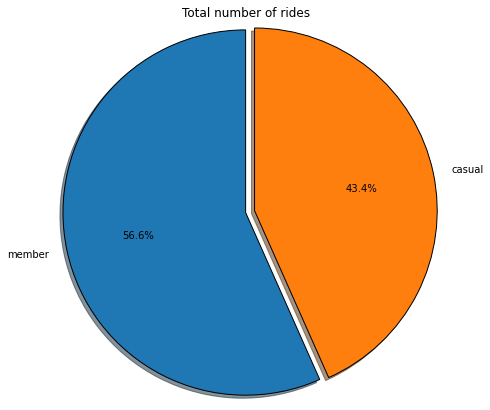

In [35]:
values = data["member_casual"].value_counts() # counting the number of casual riders and annual members using value_counts()
labels = data["member_casual"].unique().tolist() # creating labels for the pie chart
explode = [0,0.06] # for bringing one slice a little outer for better visualisation
plt.figure(figsize = (10,7)) # figure size for the plot

plt.pie(values, labels=labels, wedgeprops = {'edgecolor':'black'} ,radius = 1.2,explode = explode,shadow = True,
       autopct = '%1.1f%%', startangle = 90)
plt.title('Total number of rides')
plt.show()



**Insights**  
 * We can clearly see that annual members are taking more rides compared to the casual riders during the entire year. **But wait!!** this doesn't tell us the entire story, so we need to dig a little deeper for better analysis.

Now we will count the number of rides taken by casual and member riders in each month and then plot it.

In [36]:
month_count = pd.crosstab(data.month,data.member_casual) 
month_count

member_casual,casual,member
month,,
April,91304,178927
August,339604,329892
December,44853,130110
February,15034,73245
January,12521,66993
July,367272,319750
June,302289,301748
March,66735,147447
May,218326,279204


Dang ! so many numbers hard to interpret the results by looking at it. So we will understand it better by visualising.

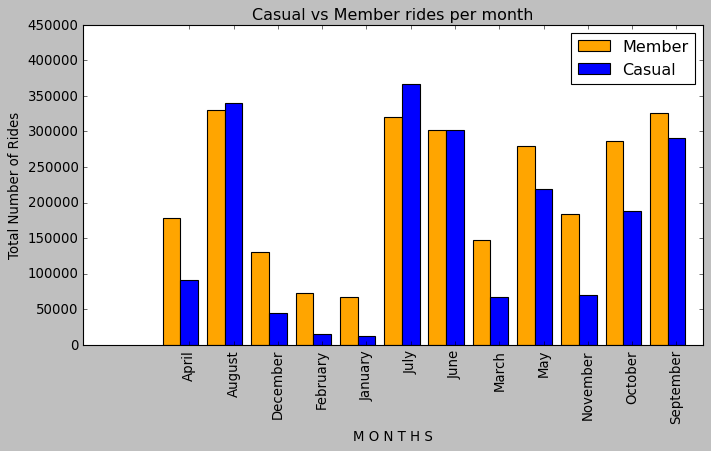

In [42]:
member_count = list(month_count['member']) 

casual_count = list(month_count["casual"])
months = data['month'].unique().tolist()
months.sort()

indx = np.arange(len(months))
bar_width = 0.4
cas_bar = [i+bar_width for i in indx]    
plt.figure(figsize = (10,5))
color = 'orange'
plt.bar(indx, member_count,width = bar_width, label = "Member",color = color)
plt.bar(cas_bar,casual_count,width = bar_width,label= 'Casual')
plt.xticks(cas_bar,months,rotation = 'vertical')
plt.ylim(0,450000)
plt.xlabel('M O N T H S')
plt.ylabel('Total Number of Rides')
plt.title('Casual vs Member rides per month')
plt.legend()
plt.show()

    


**Insights** : 
* In month of June, July, August and September people are taking more rides irrespective of rider type but  casual riders are taking more or equal number of rides than annual members in these months.
* Decmber, January and February are the least busiest months. Here Casual rides take way lesser number of rides than annual members.

Till now we have reached to an conclusion that annual riders take more number of  rides than casual riders in general but does it mean annual members take ride for longer duration? for more understanding and answering that question we need to know their mean ride length.


###  What's the mean ride length of casual riders and annual members over 12 months?

In [43]:
total_mean = data.groupby("member_casual")["ride_length (min)"].mean() # finding mean ride length of each rider type for 12 months
total_mean

member_casual
casual    30.284146
member    12.798462
Name: ride_length (min), dtype: Float64

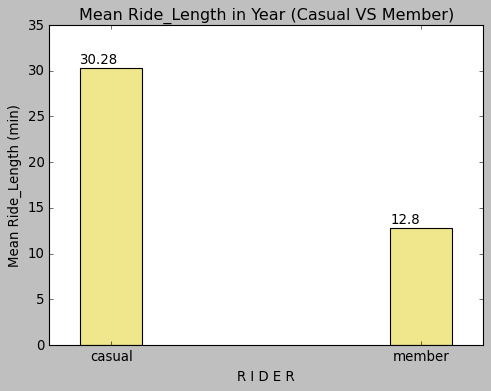

In [39]:
dic_my = dict(total_mean)
keyy = list(dic_my.keys())
valuess = list(dic_my.values())
indx = np.arange(len(keyy))
plt.figure(figsize=(7,5))


plt.style.use('classic')
bars = plt.bar(indx, valuess, width = .2, color = "Khaki",ec="black")
plt.xticks(indx, keyy)
plt.xlabel("R I D E R")

plt.ylabel("Mean Ride_Length (min)")
plt.title("Mean Ride_Length in Year (Casual VS Member)", color = "black")
for bar in bars:
    yval = bar.get_height()
    yval = round(yval, 2)
    plt.text(bar.get_x(), yval + 0.5, yval)
plt.show()

**Insights**  
* On an average a casual rider hires bike for 30.28 mins whereas an annual member hires bike for 12.8 mins which is a much  shorter duration than that of  casual riders.
* Although annual members hire more bikes than casual riders,  it's evident from the plot that casual riders hire bikes for longer duration than annual members. 

###  What's the mean ride length of casual riders and annual members over each month?

In [60]:
table = pd.pivot_table(data, index = ["month"], columns = ["member_casual"], values = "ride_length (min)", aggfunc = "mean")


In [61]:
table

member_casual,casual,member
month,,
April,26.116972,11.720422
August,28.720645,13.6768
December,24.966491,10.678265
February,25.009977,10.759096
January,27.534542,10.353828
July,33.479043,13.92745
June,38.761705,14.272446
March,28.615719,11.906495
May,27.949461,13.449077


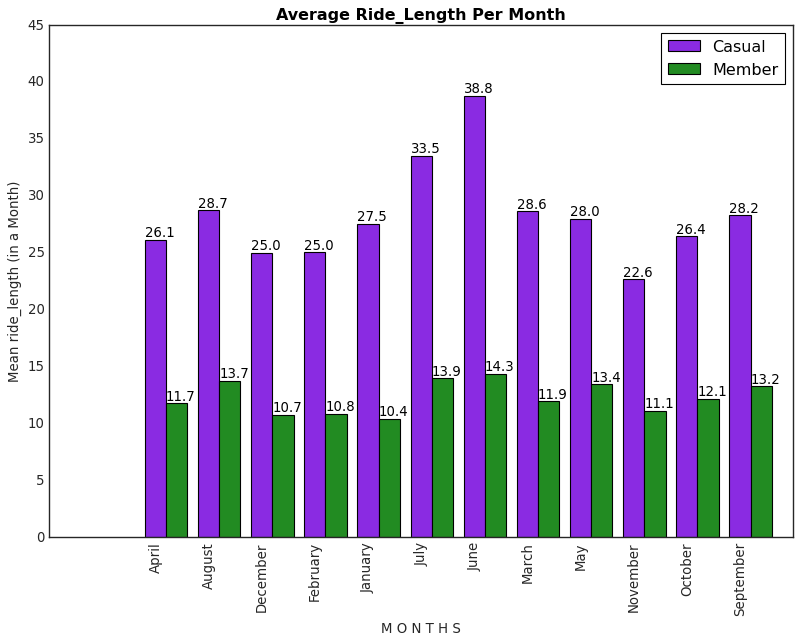

In [66]:
casual_mean_month = list(table["casual"].round(2)) # rounding each mean ride mean length to 2 decimal places
member_mean_month = list(table["member"].round(2))
months = list(table.index)
bar_width = 0.4
plt.figure(figsize=(12,8))
indx = np.arange(len(months))
mem_width = [i+bar_width for i in indx]
bars1 = plt.bar(indx, casual_mean_month,width = bar_width, color = "BlueViolet", label = "Casual") #baplot for casual riders 

bars2 = plt.bar(mem_width, member_mean_month,width =bar_width, color = "ForestGreen", label = "Member") #barplot for annual members
plt.style.use("classic")

plt.xticks(indx, months, rotation = "vertical")
plt.xlabel("M O N T H S")
plt.ylim(0,45)
plt.ylabel("Mean ride_length (in a Month)")
plt.title("Average Ride_Length Per Month", color = "black", fontweight = "bold")
plt.legend()
for bar in bars1:
    yval1 = bar.get_height().round(1)
    plt.text(bar.get_x(), yval1 + 0.3, yval1)
for bar in bars2:
    yval1 = bar.get_height().round(1)
    plt.text(bar.get_x(), yval1 + 0.3, yval1)    
plt.show()

**Insights**
* For every month we can see there is huge difference between mean ride length of casual riders and annual members for every single month.
* Casual riders take ride for longer time than annual members in every month.

## Which is the busiest hour in a day?

In [64]:
table1 = pd.pivot_table(data, index = ["started_hour"], columns = ["member_casual"], values = "start_station_name", aggfunc = "count")

table1

member_casual,casual,member
started_hour,,
0,40787,25887
1,29244,16792
2,19501,9452
3,10261,5509
4,6635,6405
5,9127,27500
6,20270,75638
7,38144,141646
8,52062,165759


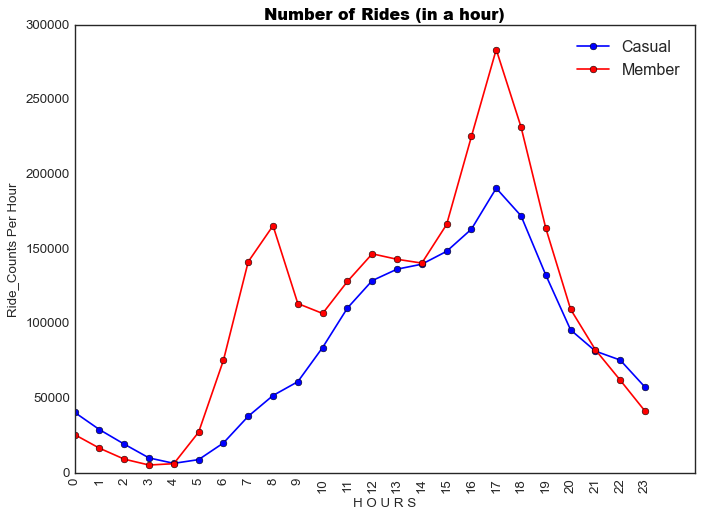

In [69]:
plt.figure(figsize = (10,7))
hours = table1.index.tolist()
casual_mean_hour = list(table1['casual'])
member_mean_hour = list(table1['member'])
plt.plot(hours,casual_mean_hour,color = 'blue',label = 'Casual',linewidth = 1.5,marker = 'o')
plt.plot(hours,member_mean_hour,color = 'red',label ='Member', linewidth = 1.5, marker = "o")
plt.legend()
plt.style.use("seaborn-white")
plt.xlabel("H O U R S")
plt.ylabel("Ride_Counts Per Hour")
plt.title("Number of Rides (in a hour)", color = "black", fontweight = "black")
plt.xticks(hours,hours, rotation= 'vertical')
plt.show()

In [67]:
table3 = pd.pivot_table(data, index = ["started_hour"], columns = ["member_casual"], values = "ride_length (min)", aggfunc = "mean")
table3

member_casual,casual,member
started_hour,,
0,32.953907,12.746166
1,37.428019,13.549309
2,38.940618,13.59945
3,40.098821,13.371755
4,48.032404,12.088525
5,21.571929,10.433818
6,20.211692,11.213755
7,19.717098,11.56075
8,22.851869,11.438021


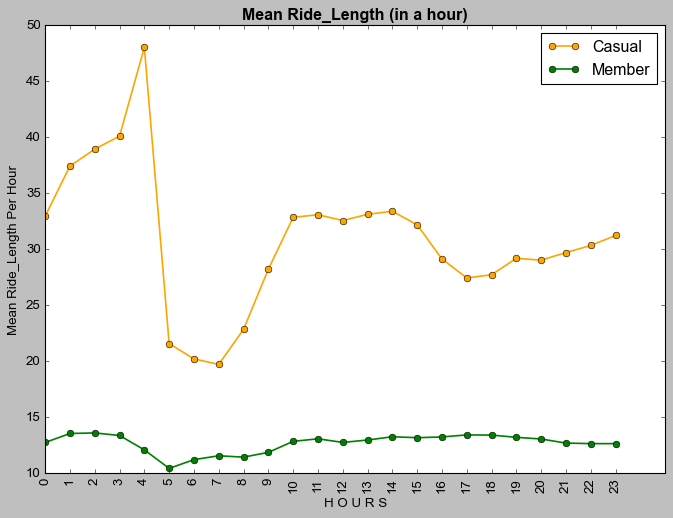

In [68]:
plt.figure(figsize = (10,7))
hours = table3.index.tolist()
casual_mean_hour = list(table3['casual'])
member_mean_hour = list(table3['member'])
plt.plot(hours,casual_mean_hour,color = 'orange',label = 'Casual',linewidth = 1.5,marker = 'o')
plt.plot(hours,member_mean_hour,color = 'green',label ='Member', linewidth = 1.5, marker = "o")
plt.legend()
plt.style.use("seaborn-white")
plt.xlabel("H O U R S")
plt.ylabel("Mean Ride_Length Per Hour")
plt.title("Mean Ride_Length (in a hour)", color = "black", fontweight = "bold")
plt.xticks(hours,hours, rotation= 'vertical')
plt.show()

**Insights** 
   * The timing between 14 - 18 is the busiest timing where the maximum no. of rides are taken by both type of riders.
   * The timing between 2-3 and 10-14 are the timings where the casual riders are driving for more time.
   * For annual members we can say that the average length for bike ride is more or less the same during each hour.

## Which is the busiest day in a week?

In [71]:
table4 = pd.crosstab(data["bike_hire_day"], data["member_casual"])
table4

member_casual,casual,member
bike_hire_day,,
Friday,278223,360681
Monday,233042,371916
Saturday,445386,347345
Sunday,382311,310779
Thursday,235142,399398
Tuesday,216784,421131
Wednesday,216156,411496


In [72]:
table4.reset_index(inplace = True)
bikeday = list(table4['bike_hire_day'])
member_type = table4['casual'].tolist()
casual_type = table4['member'].tolist()
busy_day = pd.DataFrame({'day' : bikeday, 'member' : member_type, 'casual' : casual_type})
busy_day = busy_day.sort_values('member')
busy_day

,day,member,casual
6,Wednesday,216156,411496
5,Tuesday,216784,421131
1,Monday,233042,371916
4,Thursday,235142,399398
0,Friday,278223,360681
3,Sunday,382311,310779
2,Saturday,445386,347345


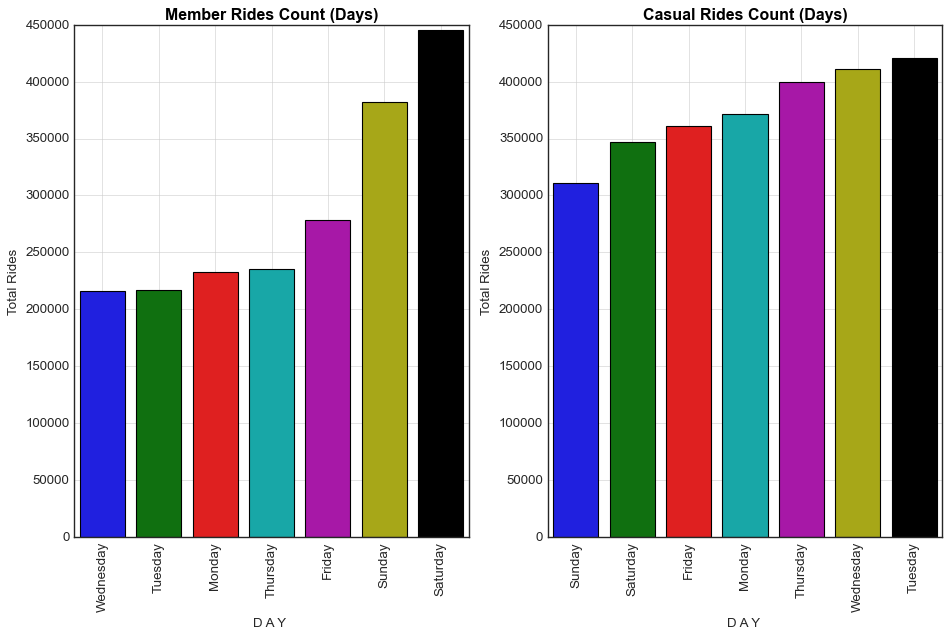

In [73]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
sns.barplot(x = 'day', y = 'member', data = busy_day)
plt.xticks(rotation = "vertical")
plt.xlabel("D A Y ")
plt.ylabel("Total Rides")
plt.title("Member Rides Count (Days)", color = "black", fontweight = "bold")

plt.grid()
busy_day = busy_day.sort_values('casual')
plt.subplot(1,2,2)
sns.barplot(x = 'day', y = 'casual', data = busy_day)
plt.xticks(rotation = "vertical")
plt.xlabel("D A Y ")
plt.ylabel("Total Rides")
plt.title("Casual Rides Count (Days)", color = "black", fontweight = "bold")
plt.grid()
plt.show()

**Insights**
  * Members tend to take more rides on Friday, Saturday, Sunday i.e. preferably on weekends whereas for Casual riders weekdays are more more busier than the weekends. 

## Which bike type is preferred most by the Cyclistic users?

In [74]:
df['rideable_type'].value_counts()

classic_bike     3217737
electric_bike    2368592
docked_bike       274447
Name: rideable_type, dtype: int64

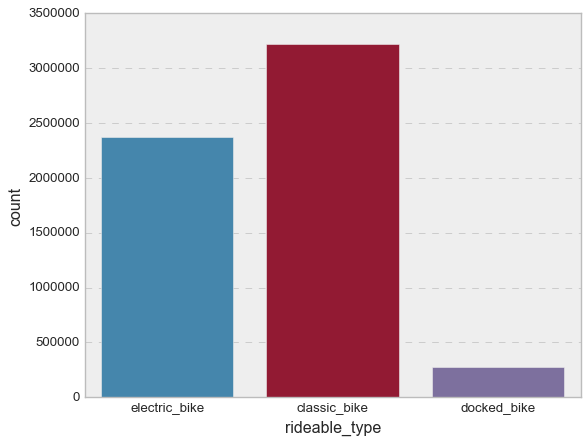

In [75]:
with plt.style.context('bmh'):
    sns.countplot(x = df.rideable_type)

In [76]:
ne  = pd.crosstab(df['rideable_type'],df['member_casual'])

**Insights** 
*  Classic bikes are the most used by both type of riders.

## Which is the most common source- destination path for the riders?

In [77]:
data["source-destination"] = data['start_station_name']+ ' --  ' + data['end_station_name']

In [78]:
count_most_sou_dest = data.groupby('source-destination')['start_station_name'].count()

In [79]:
source_dest = pd.DataFrame(count_most_sou_dest)

In [80]:
final_source_dest = source_dest.sort_values(by =['start_station_name'], ascending = False)
final_source_dest = final_source_dest.rename(columns = {'start_station_name':'count'})

In [81]:
final_source_dest.head(10)

,count
source-destination,
Streeter Dr & Grand Ave -- Streeter Dr & Gran...,12319
Ellis Ave & 60th St -- University Ave & 57th St,6283
Ellis Ave & 60th St -- Ellis Ave & 55th St,6264
University Ave & 57th St -- Ellis Ave & 60th St,5887
Michigan Ave & Oak St -- Michigan Ave & Oak St,5884
Ellis Ave & 55th St -- Ellis Ave & 60th St,5546
DuSable Lake Shore Dr & Monroe St -- DuSable ...,5229
Millennium Park -- Millennium Park,5179
DuSable Lake Shore Dr & Monroe St -- Streeter...,4340


**Insights** 
* We can clearly see that most used source-destination path is where the riders start and end the ride at the same station.

## Which is the most used starting station by the riders?

In [82]:
most_start = data.groupby("start_station_name")["ride_id"].count()
most_start = pd.DataFrame(most_start)

most_start = most_start.sort_values(by =['ride_id'], ascending = False)
most_start = most_start.rename(columns = {'ride_id':'count'})
station_count = most_start.head(10)

In [83]:
station_count.reset_index(inplace = True)

In [85]:
station_count_list = list(station_count['count'])
station_name_list = list(station_count['start_station_name'])
station_dataframe = pd.DataFrame({'start_station_name': station_name_list ,'count': station_count_list})
station_dataframe

,start_station_name,count
0,Streeter Dr & Grand Ave,80942
1,Michigan Ave & Oak St,41953
2,Wells St & Concord Ln,41575
3,Millennium Park,39020
4,Clark St & Elm St,38726
5,Wells St & Elm St,35447
6,Theater on the Lake,34575
7,Kingsbury St & Kinzie St,34178
8,Clark St & Armitage Ave,31175
9,DuSable Lake Shore Dr & North Blvd,31174


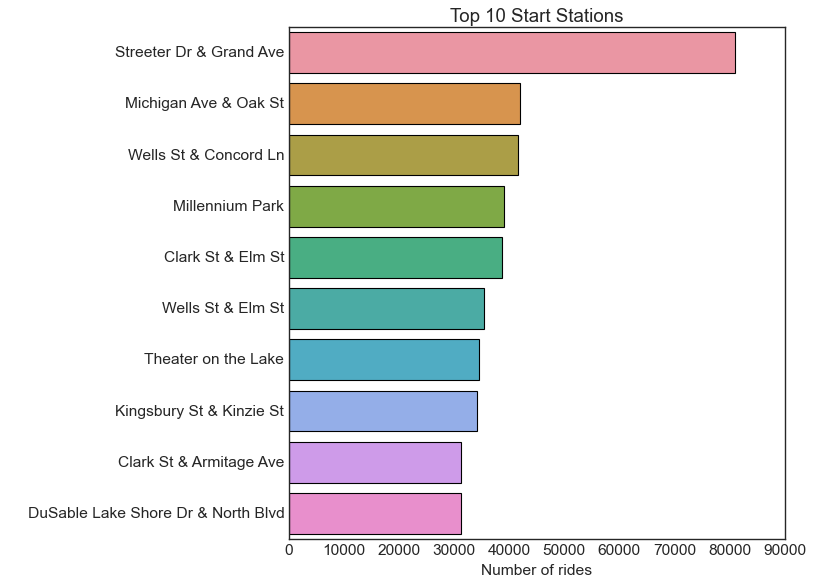

In [86]:
plt.figure(figsize = (8,8))
plt.rcParams['font.size'] = 14
sns.barplot(x = 'count',y = 'start_station_name',data =station_count)
plt.title('Top 10 Start Stations')
plt.ylabel(" ")
plt.xlabel('Number of rides')
plt.show()


**Insights**
* We can clearly see that Streeter Dr & Grand Ave is the most used starting station by the riders.

## Conclusion
 * We can clearly see that the comapany needs to focus on plans that stategise on converting a casual rider to an annual member as the mean ride length is more for casual riders.
 * The company should focus on building its campaign around the nearby areas of Streeter Dr & Grand Ave, Michigan Ave & Oak St, Wells St & Concord Ln, Millennium Par as they are the most used starting stations by the riders.
 * The company should also use its digital campaigning around 14 - 18 hours as they are the hours during which most bikes were hired and promote offer plans during these hours as they are the most preferred hours for a casual rider.
 * The company should do it campaigning around weekdays with schemes  as the Casual riders are more active during these days.

### References : 
 * https://datascience.stackexchange.com/
 * https://www.w3resource.com/
 * https://www.geeksforgeeks.org/pandas-crosstab-function-in-python/
 * https://pythonguides.com/crosstab-in-python-pandas/

### THANKYOU , AND I HOPE YOU LIKED MY WORK !!